In [ ]:
## Problema 3
# PARTE A

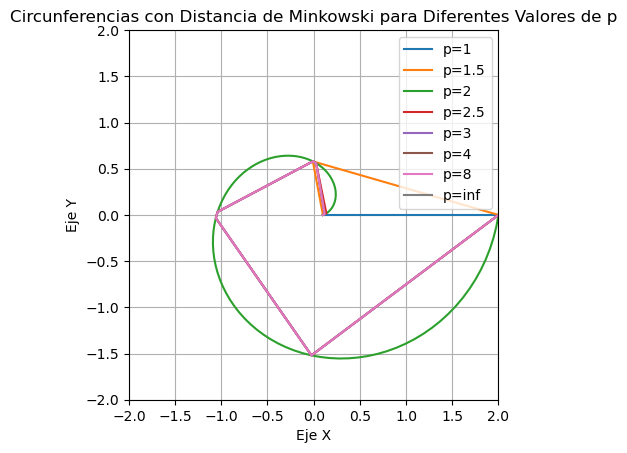

In [22]:
import matplotlib.pyplot as plt
import numpy as np

# Valores de p
p_values = [1, 1.5, 2, 2.5, 3, 4, 8, float('inf')]

# Radio de las circunferencias
radios = np.linspace(0.1, 2, 100)

# Coordenadas del centro
centro_x = 0
centro_y = 0

# Crear figura y ejes
fig, ax = plt.subplots()

# Dibujar las circunferencias para cada valor de p
for p in p_values:
    # Calcular las coordenadas de los puntos en la circunferencia
    x = centro_x + radios * np.cos(np.linspace(0, 2 * np.pi, 100))
    y = centro_y + radios * np.sin(np.linspace(0, 2 * np.pi, 100))
    
    # Calcular la distancia de Minkowski de orden p desde el centro a cada punto
    distancia = (abs(x) ** p + abs(y) ** p) ** (1/p)
    
    # Seleccionar solo los puntos donde la distancia sea igual al radio (puntos en la circunferencia)
    x_circunferencia = x[abs(distancia - radios) < 1e-3]
    y_circunferencia = y[abs(distancia - radios) < 1e-3]
    
    # Dibujar la circunferencia
    ax.plot(x_circunferencia, y_circunferencia, label=f'p={p}')

# Configurar los ejes para que sean un círculo
ax.set_aspect('equal', adjustable='box')

# Establecer límites de los ejes para que el espacio mostrado sea un círculo
ax.set_xlim([-2, 2])
ax.set_ylim([-2, 2])

ax.legend()
plt.xlabel('Eje X')
plt.ylabel('Eje Y')

# Mostrar el gráfico
plt.title('Circunferencias con Distancia de Minkowski para Diferentes Valores de p')
plt.grid(True)
plt.show()


Este código creamos un gráfico con las circunferencias de radio [0.1 - 2] utilizando la distancia de Minkowski de orden  p para p en el rango de valores especificados en p_values. A medida que cambiamos los valores en p_values, se verá cómo se modifican las circunferencias.

Observaciones importantes:

1. Cuando (p = 1): La distancia de Minkowski con (p = 1) es equivalente a la distancia de Manhattan. En este caso, las circunferencias tienen formas cuadradas con esquinas en los ejes, ya que la distancia de Manhattan considera solo movimientos verticales y horizontales.

2. Cuando (p = 2): La distancia de Minkowski con (p = 2) es equivalente a la distancia euclidiana. Las circunferencias son los círculos tradicionales que estamos acostumbrados a ver.

3. Cuando (p > 2): A medida que (p) aumenta más allá de (2), las circunferencias se vuelven cada vez más "cuadradas". Esto significa que la distancia de Minkowski con (p) grande tiende a considerar más fuertemente los movimientos en las diagonales y menos los movimientos en direcciones rectas.

4. Cuando (p = \infty\): La distancia de Minkowski con (p = \infty\) es equivalente a la distancia del máximo. En este caso, las circunferencias se convierten en cuadrados con lados paralelos a los ejes, ya que la distancia del máximo solo considera la coordenada que tiene la mayor diferencia en valor absoluto.

En resumen, la gráfica muestra cómo cambia la forma de las circunferencias a medida que varía el valor de (p) en la distancia de Minkowski. Para valores bajos de (p), las circunferencias son más redondas, mientras que para valores altos de (p), las circunferencias se vuelven más cuadradas. Esto ilustra cómo diferentes métricas de distancia pueden afectar la forma y la noción de cercanía en un espacio métrico.

# PARTE B

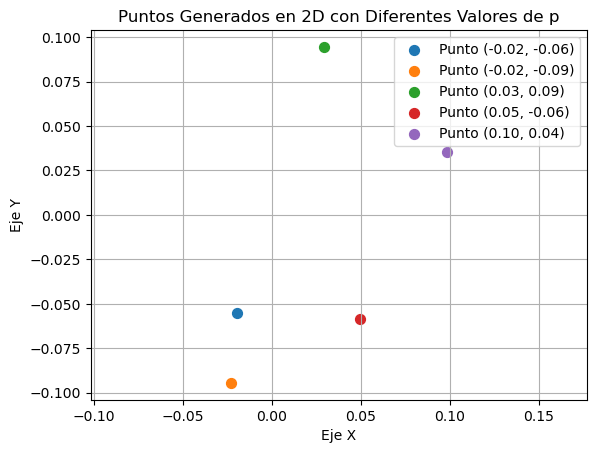

In [24]:
import matplotlib.pyplot as plt
import numpy as np

# Valores de p
p_values = [1, 1.5, 2, 2.5, 3, 4, 8, float('inf')]

# Número de puntos aleatorios generados
num_puntos = 5

# Radio máximo para la distancia al origen
radio_maximo = 0.1

# Dimensionalidad n
n = 10  # Se puede ajustar la dimensionalidad según se requiera

# Lista para almacenar los puntos generados
puntos_generados = []

# Generar puntos aleatorios
for _ in range(num_puntos):
    coordenadas = np.random.uniform(-radio_maximo, radio_maximo, n)
    norma = np.linalg.norm(coordenadas, ord=np.inf)
    factor_de_escala = radio_maximo / norma
    punto = coordenadas * factor_de_escala
    puntos_generados.append(punto)

# Crear una figura y ejes
fig, ax = plt.subplots()

# Graficar los puntos generados
for punto in puntos_generados:
    ax.scatter(punto[0], punto[1], s=50, marker='o', label=f'Punto ({punto[0]:.2f}, {punto[1]:.2f})')

# Configurar los ejes
ax.set_aspect('equal', adjustable='datalim')
plt.xlabel('Eje X')
plt.ylabel('Eje Y')

# Agregar leyenda
ax.legend()

# Mostrar el gráfico
plt.title('Puntos Generados en 2D con Diferentes Valores de p')
plt.grid(True)
plt.show()



# PROBLEMA 4

In [1]:
pip install opencv-python


Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import cv2  # OpenCV para cargar y mostrar imágenes
import numpy as np
import matplotlib.pyplot as plt


In [12]:
# Cargar la imagen objetivo y la imagen inicial
imagen_objetivo = cv2.imread('nueva_imagen.jpg', cv2.IMREAD_GRAYSCALE)
imagen_inicial = cv2.imread('nueva_imagen.jpg', cv2.IMREAD_GRAYSCALE)

In [19]:
# Parámetros
max_iteraciones = 1000
umbral_convergencia = 240000
tasa_convergencia = 0.01  # Ajusta la tasa de convergencia según sea necesario


In [20]:

imagen_generada = imagen_inicial.copy()  # Inicializa con la imagen inicial

 

for iteracion in range(max_iteraciones):
    # Calcular la distancia euclidiana entre la imagen generada y la imagen objetivo
    distancia = np.sum((imagen_generada.astype(float) - imagen_objetivo.astype(float)) ** 2)

    if distancia < umbral_convergencia:
        print(f"Convergencia alcanzada en la iteración {iteracion + 1}")
        break

    # Ajustar la imagen generada hacia la imagen objetivo (promedio ponderado)
    imagen_generada = imagen_generada + tasa_convergencia * (imagen_objetivo - imagen_generada)

    # Guardar la imagen generada en cada iteración (opcional)
    cv2.imwrite(f'imagen_iteracion_{iteracion}.jpg', imagen_generada)


Convergencia alcanzada en la iteración 1


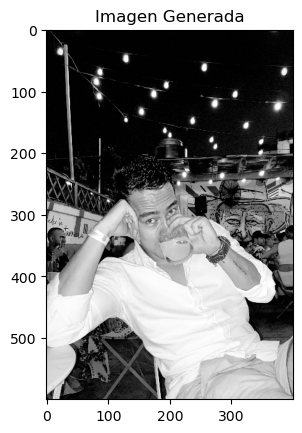

In [21]:
# Mostrar la imagen generada final
plt.imshow(imagen_generada, cmap='gray')
plt.title('Imagen Generada')
plt.show()

La tasa de convergencia determina cuánto se ajusta la imagen generada hacia la imagen objetivo en cada iteración. 

Un valor mayor de tasa de convergencia hará que la imagen generada converja más rápidamente hacia la imagen objetivo, pero también puede hacer que el proceso sea más inestable. Un valor más bajo de tasa de convergencia hará que el proceso sea más lento pero más estable.


Número Máximo de Iteraciones (max_iteraciones): Este valor establece el límite superior para el número de iteraciones que el bucle de convergencia ejecutará. Si la sucesión no converge después de un número determinado de iteraciones, el bucle se detendrá. Este valor se utiliza para evitar que el código se ejecute indefinidamente en caso de que la convergencia sea difícil de alcanzar. Puedes ajustar este valor según cuántas iteraciones estés dispuesto a permitir antes de declarar que la convergencia es improbable o innecesaria.

 

### Problema 6: Cree un algoritmo para aproximar \\A\\ inducida por una norma vectorial

In [25]:
import numpy as np

def norma_inducida_aproximada(A, vectores_norma_uno):
    max_norm = 0.0  # Inicializa la norma máxima como cero
    
#la función np.dot calcula el producto de puntos de dos matrices de entrada
    for X in vectores_norma_uno:
        producto = np.dot(A, X)  # Calcula A * X utilizando NumPy
        norma_producto = calcular_norma(producto)  # Calcula la norma del producto
        
        if norma_producto > max_norm:
            max_norm = norma_producto  # Actualiza la norma máxima si es necesario
    
    return max_norm

# Función para calcular la norma de un vector
def calcular_norma(vector):
    return np.linalg.norm(vector)  # Utiliza la función de norma de NumPy

In [26]:
import random

# Función para generar una matriz aleatoria de tamaño m x n
def generar_matriz_aleatoria(m, n):
    matriz = []
    for i in range(m):
        fila = [random.randint(1, 100) for _ in range(n)]  # Genera números aleatorios entre 1 y 100
        matriz.append(fila)
    return matriz

# Genera matrices aleatorias de 1x1 a 30x30
for tamaño in range(1, 11):
    matriz = generar_matriz_aleatoria(tamaño, tamaño)
    print(f"Matriz {tamaño}x{tamaño}:")
    for fila in matriz:
        print(fila)
    print()

Matriz 1x1:
[90]

Matriz 2x2:
[82, 60]
[20, 52]

Matriz 3x3:
[42, 94, 29]
[43, 23, 100]
[67, 12, 85]

Matriz 4x4:
[64, 19, 86, 95]
[60, 99, 68, 87]
[40, 21, 61, 42]
[98, 68, 97, 2]

Matriz 5x5:
[100, 3, 8, 31, 92]
[71, 46, 22, 32, 42]
[44, 57, 59, 62, 63]
[12, 32, 10, 42, 4]
[69, 89, 7, 26, 66]

Matriz 6x6:
[44, 28, 72, 11, 16, 98]
[63, 48, 69, 91, 12, 42]
[33, 90, 88, 9, 58, 29]
[2, 84, 29, 80, 87, 89]
[86, 29, 71, 5, 82, 59]
[41, 83, 40, 56, 12, 5]

Matriz 7x7:
[81, 31, 18, 26, 99, 55, 29]
[100, 11, 54, 48, 53, 39, 45]
[22, 77, 39, 4, 65, 99, 73]
[9, 84, 46, 40, 63, 25, 1]
[54, 40, 9, 9, 66, 99, 83]
[55, 10, 62, 45, 1, 97, 64]
[24, 71, 40, 5, 99, 18, 31]

Matriz 8x8:
[47, 94, 20, 21, 70, 52, 72, 33]
[18, 19, 14, 93, 20, 56, 61, 48]
[20, 95, 82, 56, 69, 75, 64, 14]
[45, 34, 94, 18, 69, 29, 99, 73]
[25, 13, 56, 49, 2, 40, 3, 38]
[45, 15, 12, 27, 79, 11, 96, 48]
[1, 7, 50, 5, 77, 25, 96, 33]
[60, 64, 82, 80, 19, 39, 30, 69]

Matriz 9x9:
[55, 80, 70, 34, 90, 54, 22, 89, 53]
[75, 14, 65, 

In [27]:
norma_aproximada = norma_inducida_aproximada(tamaño, matriz)
print("Norma Inducida Aproximada:", norma_aproximada)

Norma Inducida Aproximada: 2239.106964841117


In [28]:
#Punto 6.a

In [29]:
import random

# Función para generar una matriz H de tamaño n x n
def generar_matriz_H(n):
    matriz_H = []
    for i in range(1, n + 1):
        fila = [1 / (i + j) for j in range(1, n + 1)]
        matriz_H.append(fila)
    return matriz_H

# Genera y prueba matrices H1 a H10
for n in range(1, 11):
    matriz_H = generar_matriz_H(n)
    
    print(f"Matriz H{n}:")
    for fila in matriz_H:
        print(fila)
    
    # Calcula y muestra la norma inducida aproximada
    vectores_norma_uno = [random.choices([-1, 1], k=n) for _ in range(10)]  # Genera 10 vectores aleatorios de norma 1
    norma_aproximada = norma_inducida_aproximada(matriz_H, vectores_norma_uno)
    print("Norma Inducida Aproximada:", norma_aproximada)
    print()


Matriz H1:
[0.5]
Norma Inducida Aproximada: 0.5

Matriz H2:
[0.5, 0.3333333333333333]
[0.3333333333333333, 0.25]
Norma Inducida Aproximada: 1.0172129679778084

Matriz H3:
[0.5, 0.3333333333333333, 0.25]
[0.3333333333333333, 0.25, 0.2]
[0.25, 0.2, 0.16666666666666666]
Norma Inducida Aproximada: 1.4722431864335455

Matriz H4:
[0.5, 0.3333333333333333, 0.25, 0.2]
[0.3333333333333333, 0.25, 0.2, 0.16666666666666666]
[0.25, 0.2, 0.16666666666666666, 0.14285714285714285]
[0.2, 0.16666666666666666, 0.14285714285714285, 0.125]
Norma Inducida Aproximada: 1.2381072572676675

Matriz H5:
[0.5, 0.3333333333333333, 0.25, 0.2, 0.16666666666666666]
[0.3333333333333333, 0.25, 0.2, 0.16666666666666666, 0.14285714285714285]
[0.25, 0.2, 0.16666666666666666, 0.14285714285714285, 0.125]
[0.2, 0.16666666666666666, 0.14285714285714285, 0.125, 0.1111111111111111]
[0.16666666666666666, 0.14285714285714285, 0.125, 0.1111111111111111, 0.1]
Norma Inducida Aproximada: 1.5693570501222645

Matriz H6:
[0.5, 0.33333333